Точність класифікації: 83.50%


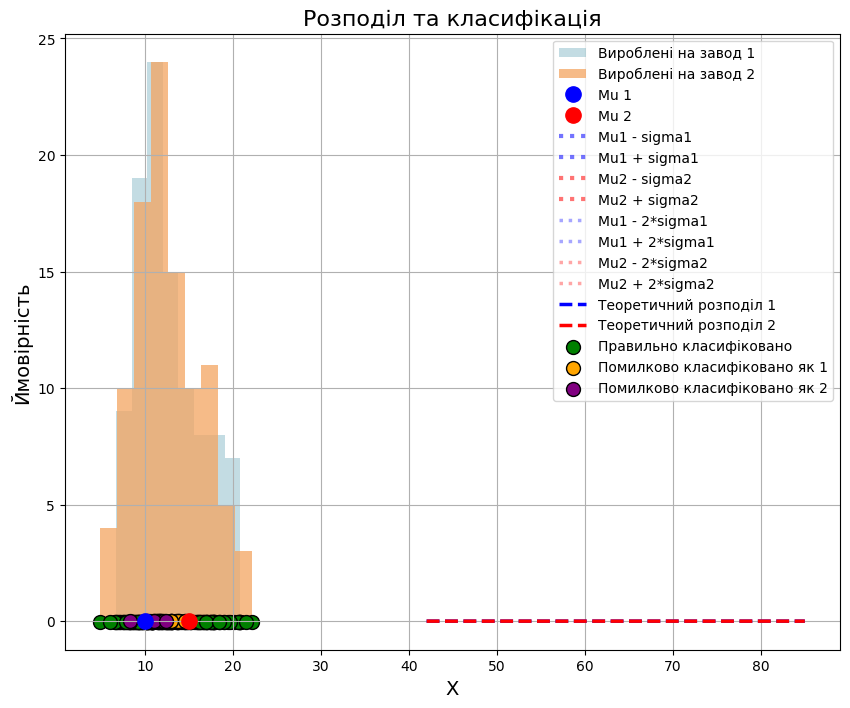

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

# Функція гаусівського розподілу
def gaus_func(mu, sigma, x):
    return math.e**(-(x-mu)**2/(2*sigma**2)) / (sigma*(2*math.pi)**0.5)

# Обчислення ймовірностей P1(x) та P2(x) для кожного значення x
def proba_x(X, w1, w2, mu_1, mu_2, sigma_1, sigma_2):
    proba_X = []
    for i in X:
        # Обчислення P1(x) та P2(x)
        P1_x = gaus_func(mu_1, sigma_1, i)
        P2_x = gaus_func(mu_2, sigma_2, i)
        
        # Обчислення загальної ймовірності P(x)
        P_x = w1 * P1_x + w2 * P2_x
        
        # Обчислення умовних ймовірностей P(x|1) та P(x|2)
        P_x_1 = (w1 * P1_x) / P_x
        P_x_2 = (w2 * P2_x) / P_x
        
        # Збереження умовних ймовірностей в список
        proba_temp = [P_x_1, P_x_2]
        proba_X.append(proba_temp)
    
    return proba_X

# Прогнозування класу для кожного значення x з використанням заданого порогу ймовірності
def pred_x(proba_X, limit_proba):
    pred_X = []
    for x in proba_X:
        if x[0] >= limit_proba:
            pred_X.append(1)
        else:
            pred_X.append(2)
    return np.array(pred_X)

# Побудова графіку розподілу і класифікації
def graph(X, pred_X, mu_1, sigma_1, mu_2, sigma_2):
    true_pred = []
    false_pred_1 = []
    false_pred_2 = []
    
    # Розділення правильно класифікованих і помилково класифікованих точок
    for i in range(X.shape[0]):
        if pred_X[i] == y[i]:
            true_pred.append([X[i], -0.025])
        else:
            if y[i] == 1:
                false_pred_1.append([X[i], -0.0075])
            else:
                false_pred_2.append([X[i], -0.015])

    false_pred_1 = np.array(false_pred_1)            
    false_pred_2 = np.array(false_pred_2)
    true_pred = np.array(true_pred)

    x_theory = np.linspace(42, 85, 20000)
    
    # Обчислення теоретичних значень гаусівських функцій
    y_theory_1 = []
    for x in x_theory:
        y_theory_1.append(gaus_func(mu_1, sigma_1, x))
        
    y_theory_2 = []
    for x in x_theory:
        y_theory_2.append(gaus_func(mu_2, sigma_2, x))

    plt.figure(figsize=(10, 8))    
    # Побудова гістограми розподілу
    plt.hist(X[:N1], bins='auto', color='#539caf', alpha=0.35, label='Вироблені на завод 1')
    plt.hist(X[N1:N], bins='auto', color='sandybrown', alpha=0.75, label='Вироблені на завод 2')
    
    # Побудова точок mu1 та mu2
    plt.plot(mu_1, 0, 'o', markersize=11, color='blue', label='Mu 1')
    plt.plot(mu_2, 0, 'o', markersize=11, color='red', label='Mu 2')

    # Побудова ліній, що показують значення mu1 ± sigma1 та mu2 ± sigma2
    plt.plot([mu_1 - sigma_1, mu_1 - sigma_1], [0, 0.85*np.max(y_theory_1)],
             ':', lw=3, color='blue', alpha=0.55, label='Mu1 - sigma1')
    plt.plot([mu_1 + sigma_1, mu_1 + sigma_1], [0, 0.85*np.max(y_theory_1)],
             ':', lw=3, color='blue', alpha=0.55, label='Mu1 + sigma1')
    plt.plot([mu_2 - sigma_2, mu_2 - sigma_2], [0, 0.85*np.max(y_theory_2)],
             ':', lw=3, color='red', alpha=0.55, label='Mu2 - sigma2')
    plt.plot([mu_2 + sigma_2, mu_2 + sigma_2], [0, 0.85*np.max(y_theory_2)],
             ':', lw=3, color='red', alpha=0.55, label='Mu2 + sigma2')

    # Побудова ліній, що показують значення mu1 ± 2*sigma1 та mu2 ± 2*sigma2
    plt.plot([mu_1 - 2 * sigma_1, mu_1 - 2 * sigma_1], [0, 0.9*0.5 * np.max(y_theory_1)],
             ':', lw=2.5, color='blue', alpha=0.35, label='Mu1 - 2*sigma1')
    plt.plot([mu_1 + 2 * sigma_1, mu_1 + 2 * sigma_1], [0, 0.9*0.5 * np.max(y_theory_1)],
             ':', lw=2.5, color='blue', alpha=0.35, label='Mu1 + 2*sigma1')
    plt.plot([mu_2 - 2 * sigma_2, mu_2 - 2 * sigma_2], [0, 0.9*0.5 * np.max(y_theory_2)],
             ':', lw=2.5, color='red', alpha=0.35, label='Mu2 - 2*sigma2')
    plt.plot([mu_2 + 2 * sigma_2, mu_2 + 2 * sigma_2], [0, 0.9*0.5 * np.max(y_theory_2)],
             ':', lw=2.5, color='red', alpha=0.35, label='Mu2 + 2*sigma2')

    # Побудова графіку теоретичного розподілу
    plt.plot(x_theory, y_theory_1, '--', lw=2.5, color='blue', label='Теоретичний розподіл 1')
    plt.plot(x_theory, y_theory_2, '--', lw=2.5, color='red', label='Теоретичний розподіл 2')
    
    # Побудова точок класифікації
    plt.scatter(true_pred[:, 0], true_pred[:, 1], s=100, color='green', edgecolors='black', label='Правильно класифіковано')
    plt.scatter(false_pred_1[:, 0], false_pred_1[:, 1], s=100, color='orange', edgecolors='black', label='Помилково класифіковано як 1')
    plt.scatter(false_pred_2[:, 0], false_pred_2[:, 1], s=100, color='purple', edgecolors='black', label='Помилково класифіковано як 2')

    plt.xlabel('X', fontsize=14)
    plt.ylabel('Ймовірність', fontsize=14)
    plt.title('Розподіл та класифікація', fontsize=16)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Задання параметрів генерування даних
mu_1 = 10
sigma_1 = 2
w1 = 0.5

mu_2 = 15
sigma_2 = 3
w2 = 0.5

N1 = 100
N2 = 100
N = N1 + N2

# Генерація даних
np.random.seed(0)
X1 = np.random.normal(mu_1, sigma_1, N1)
X2 = np.random.normal(mu_2, sigma_2, N2)
X = np.concatenate((X1, X2))

# Генерація вектора відповідей
y = np.concatenate((np.ones(N1), np.ones(N2)*2))

# Перемішування даних
combined = list(zip(X, y))
random.shuffle(combined)
X[:], y[:] = zip(*combined)

# Розрахунок ймовірностей та класифікація
proba_X = proba_x(X, w1, w2, mu_1, mu_2, sigma_1, sigma_2)
pred_X = pred_x(proba_X, 0.5)

# Розрахунок точності класифікації
accuracy = accuracy_score(y, pred_X)
print("Точність класифікації: %.2f%%" % (accuracy * 100))

# Побудова графіку розподілу та класифікації
graph(X, pred_X, mu_1, sigma_1, mu_2, sigma_2)